In [2]:
#imported all of the functions and applications I may need for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [3]:
#Loaded all of the data from the csv file. Took a quick look to see if it loaded corrrectly.
life_exp_df = pd.read_csv('life_expect_data.csv')
life_exp_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
#Renamed all of the columns so they would be easier to work with.
life_exp_df.columns=['country', 'year', 'status', 'life_expect','adult_mort','infant_deaths','alcohol', 'percentage_exp', 'hep_b',
                    'measles', 'bmi', 'under_5_deaths', 'polio', 'total_exp', 'diphtheria', 'hiv_aids', 'gdp', 'population', 'thinness_19', 'thinness_5-9', 'inc_comp_of_res', 'schooling']
life_exp_df.head()

,country,year,status,life_expect,adult_mort,infant_deaths,alcohol,percentage_exp,hep_b,measles,...,polio,total_exp,diphtheria,hiv_aids,gdp,population,thinness_19,thinness_5-9,inc_comp_of_res,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
#Took another quick look to see how many null values there are in the data.
life_exp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
country            2938 non-null object
year               2938 non-null int64
status             2938 non-null object
life_expect        2928 non-null float64
adult_mort         2928 non-null float64
infant_deaths      2938 non-null int64
alcohol            2744 non-null float64
percentage_exp     2938 non-null float64
hep_b              2385 non-null float64
measles            2938 non-null int64
bmi                2904 non-null float64
under_5_deaths     2938 non-null int64
polio              2919 non-null float64
total_exp          2712 non-null float64
diphtheria         2919 non-null float64
hiv_aids           2938 non-null float64
gdp                2490 non-null float64
population         2286 non-null float64
thinness_19        2904 non-null float64
thinness_5-9       2904 non-null float64
inc_comp_of_res    2771 non-null float64
schooling          2775 non-null float64
d

In [6]:
#Filled all of the null values with the mean for that column.

print(life_exp_df["life_expect"].fillna(life_exp_df["life_expect"].interpolate(), inplace=True))
life_exp_df["alcohol"].fillna(life_exp_df["alcohol"].interpolate(), inplace=True)
life_exp_df["hep_b"].fillna(life_exp_df["hep_b"].interpolate(), inplace=True)
life_exp_df["bmi"].fillna(life_exp_df["bmi"].interpolate(), inplace=True)
life_exp_df["polio"].fillna(life_exp_df["polio"].interpolate(), inplace=True)
life_exp_df["total_exp"].fillna(life_exp_df["total_exp"].interpolate(), inplace=True)
life_exp_df["diphtheria"].fillna(life_exp_df["diphtheria"].interpolate(), inplace=True)
life_exp_df["gdp"].fillna(life_exp_df["gdp"].interpolate(), inplace=True)
life_exp_df["population"].fillna(life_exp_df["population"].interpolate(), inplace=True)
life_exp_df["thinness_19"].fillna(life_exp_df["thinness_19"].interpolate(), inplace=True)
life_exp_df["thinness_5-9"].fillna(life_exp_df["thinness_5-9"].interpolate(), inplace=True)
print(life_exp_df["inc_comp_of_res"].fillna(life_exp_df["inc_comp_of_res"].interpolate(), inplace=True))
print(life_exp_df["schooling"].fillna(life_exp_df["schooling"].interpolate(), inplace=True))


life_exp_df.dropna(inplace=True)

None
None
None


In [7]:
#Double checked to see if the null values were replaced.
life_exp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
country            2928 non-null object
year               2928 non-null int64
status             2928 non-null object
life_expect        2928 non-null float64
adult_mort         2928 non-null float64
infant_deaths      2928 non-null int64
alcohol            2928 non-null float64
percentage_exp     2928 non-null float64
hep_b              2928 non-null float64
measles            2928 non-null int64
bmi                2928 non-null float64
under_5_deaths     2928 non-null int64
polio              2928 non-null float64
total_exp          2928 non-null float64
diphtheria         2928 non-null float64
hiv_aids           2928 non-null float64
gdp                2928 non-null float64
population         2928 non-null float64
thinness_19        2928 non-null float64
thinness_5-9       2928 non-null float64
inc_comp_of_res    2928 non-null float64
schooling          2928 non-null float64
d

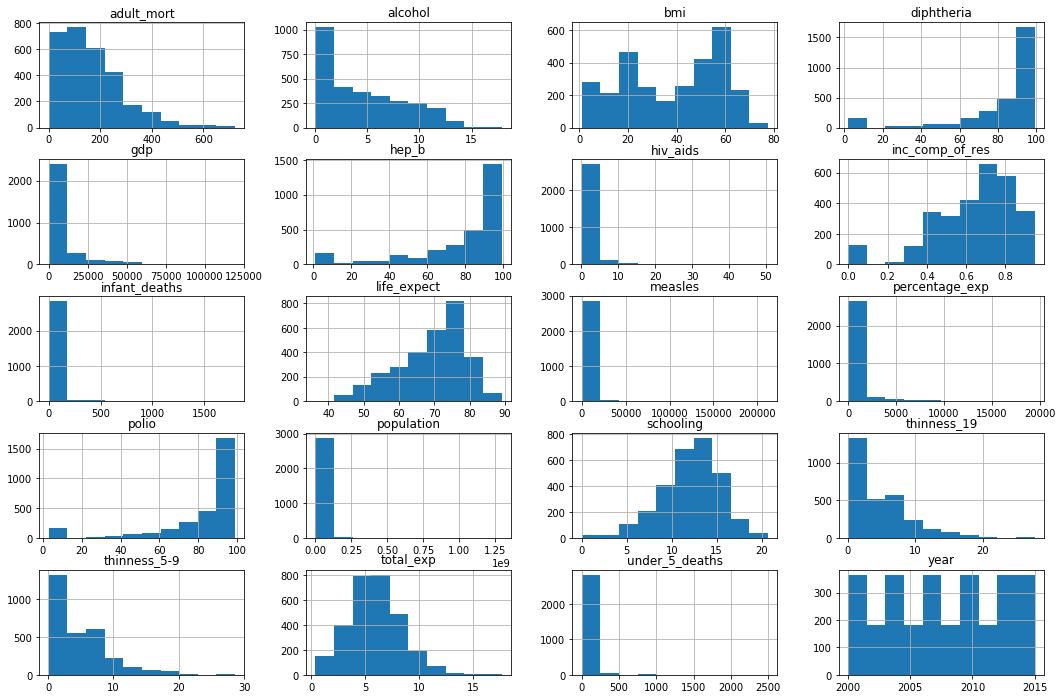

In [8]:
#Another quick visual to see what the distributions of the data looked like.
life_exp_df.hist(figsize=(18,12));

In [9]:
#Used describe to see if there were any outliers. There were quite a few, I am assuming that it is because in some countries
#they have an extemely high level of some of these diseases compared to the more indrustrialize nations.

life_exp_df.describe()

,year,life_expect,adult_mort,infant_deaths,alcohol,percentage_exp,hep_b,measles,bmi,under_5_deaths,polio,total_exp,diphtheria,hiv_aids,gdp,population,thinness_19,thinness_5-9,inc_comp_of_res,schooling
count,2928.00000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2.928000e+03,2928.000000,2928.000000,2928.000000,2928.000000
mean,2007.50000,69.224932,164.796448,30.407445,4.562003,740.321185,78.536714,2427.855874,38.208504,42.179303,82.472507,5.933245,82.243169,1.747712,7453.326138,1.231344e+07,4.895150,4.933538,0.634565,12.083265
std,4.61056,9.523867,124.292079,118.114450,3.993677,1990.930605,25.143640,11485.970937,19.911116,160.700547,23.409355,2.431379,23.695410,5.085542,13429.861542,5.480745e+07,4.434758,4.534016,0.209718,3.331513
min,2000.00000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.75000,63.100000,74.000000,0.000000,0.927500,4.853964,71.000000,0.000000,19.300000,0.000000,78.000000,4.310000,78.000000,0.100000,553.183093,2.547908e+05,1.600000,1.600000,0.500000,10.200000
50%,2007.50000,72.100000,144.000000,3.000000,3.725000,65.611455,89.000000,17.000000,43.150000,4.000000,93.000000,5.750000,93.000000,0.100000,2194.530250,1.576319e+06,3.400000,3.400000,0.684000,12.400000
75%,2011.25000,75.700000,228.000000,22.000000,7.560000,442.614322,96.000000,362.250000,56.100000,28.000000,97.000000,7.440000,97.000000,0.800000,7205.819672,8.217962e+06,7.200000,7.300000,0.791260,14.300000
max,2015.00000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [10]:
#Printed a list of the column names for future use.

list(life_exp_df.columns.values)

['country',
 'year',
 'status',
 'life_expect',
 'adult_mort',
 'infant_deaths',
 'alcohol',
 'percentage_exp',
 'hep_b',
 'measles',
 'bmi',
 'under_5_deaths',
 'polio',
 'total_exp',
 'diphtheria',
 'hiv_aids',
 'gdp',
 'population',
 'thinness_19',
 'thinness_5-9',
 'inc_comp_of_res',
 'schooling']

In [11]:
#Created a correlation matrix to see what stood out regarding a correlation to life expectancy. It appears the three
#strongest correlations are BMI, income composition of resources, and the highest, Schooling.

life_exp_df[['country',
 'year',
 'status',
 'life_expect',
 'adult_mort',
 'infant_deaths',
 'alcohol',
 'percentage_exp',
 'hep_b',
 'measles',
 'bmi',
 'under_5_deaths',
 'polio',
 'total_exp',
 'diphtheria',
 'hiv_aids',
 'gdp',
 'population',
 'thinness_19',
 'thinness_5-9',
 'inc_comp_of_res',
 'schooling']].corr()

,year,life_expect,adult_mort,infant_deaths,alcohol,percentage_exp,hep_b,measles,bmi,under_5_deaths,polio,total_exp,diphtheria,hiv_aids,gdp,population,thinness_19,thinness_5-9,inc_comp_of_res,schooling
year,1.000000,0.170033,-0.079052,-0.036464,-0.060726,0.032723,0.147493,-0.081840,0.095834,-0.041980,0.095912,0.076304,0.135645,-0.138789,0.092440,0.021011,-0.035260,-0.037367,0.226031,0.190335
life_expect,0.170033,1.000000,-0.696359,-0.196557,0.400598,0.381864,0.249067,-0.157586,0.560932,-0.222529,0.460816,0.213000,0.475060,-0.556556,0.436101,-0.006794,-0.478476,-0.474138,0.691405,0.707392
adult_mort,-0.079052,-0.696359,1.000000,0.078756,-0.196074,-0.242860,-0.164755,0.031176,-0.384293,0.094146,-0.273070,-0.115548,-0.273817,0.523821,-0.284570,-0.026056,0.307909,0.314972,-0.442298,-0.434357
infant_deaths,-0.036464,-0.196557,0.078756,1.000000,-0.115922,-0.085906,-0.201649,0.501038,-0.226701,0.996628,-0.169752,-0.126273,-0.174304,0.024955,-0.107943,0.538475,0.462903,0.467388,-0.132837,-0.175433
alcohol,-0.060726,0.400598,-0.196074,-0.115922,1.000000,0.337648,0.092074,-0.051295,0.328371,-0.113133,0.223495,0.295589,0.219354,-0.049357,0.341716,-0.029767,-0.424714,-0.412774,0.442385,0.507884
percentage_exp,0.032723,0.381864,-0.242860,-0.085906,0.337648,1.000000,-0.033231,-0.056831,0.230628,-0.088152,0.147990,0.171443,0.144417,-0.098230,0.871308,-0.016412,-0.253366,-0.254852,0.359709,0.371453
hep_b,0.147493,0.249067,-0.164755,-0.201649,0.092074,-0.033231,1.000000,-0.130101,0.176343,-0.209492,0.444382,0.098482,0.531744,-0.117979,0.032518,-0.080242,-0.143280,-0.152161,0.193438,0.196894
measles,-0.081840,-0.157586,0.031176,0.501038,-0.051295,-0.056831,-0.130101,1.000000,-0.175410,0.507718,-0.135354,-0.103042,-0.141060,0.030673,-0.067772,0.229641,0.222141,0.217687,-0.087988,-0.083881
bmi,0.095834,0.560932,-0.384293,-0.226701,0.328371,0.230628,0.176343,-0.175410,1.000000,-0.237050,0.284820,0.230411,0.283146,-0.243154,0.275435,-0.060410,-0.532670,-0.539280,0.467141,0.499890
under_5_deaths,-0.041980,-0.222529,0.094146,0.996628,-0.113133,-0.088152,-0.209492,0.507718,-0.237050,1.000000,-0.187752,-0.127864,-0.194782,0.037783,-0.111309,0.526023,0.465232,0.468593,-0.150304,-0.190525


In [12]:
#I narrowed the range of features to see the eigen values and vectors for these chosen features. Three of these features 
#displayed a value greater than one for the eigen values.

X = StandardScaler().fit_transform(life_exp_df[[
 'bmi',
 'polio',
 'diphtheria',
 'hiv_aids',
 'gdp',
 'population',
 'schooling']])

Xt = X.T
Cx = np.cov(Xt)

print('Covariance Matrix:\n', Cx)

eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

for i in range (len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:,i].T
    print('Eigenvector {}: \n {}'.format(i+1, eig_vec_cov))
    print('eigenvalue {}: {}'.format(i+1,eig_val_cov[i]))
print('The percentage of total variance in the dataset explained by each','component calculated by hand. \n',
     eig_val_cov/sum(eig_val_cov))

Covariance Matrix:
 [[ 1.00034165  0.28491714  0.28324259 -0.24323745  0.2755287  -0.06043076
   0.50006052]
 [ 0.28491714  1.00034165  0.67416133 -0.15861386  0.19713864 -0.02773261
   0.3824237 ]
 [ 0.28324259  0.67416133  1.00034165 -0.16416996  0.18662098 -0.01570365
   0.37863699]
 [-0.24323745 -0.15861386 -0.16416996  1.00034165 -0.13471497 -0.02675086
  -0.2191814 ]
 [ 0.2755287   0.19713864  0.18662098 -0.13471497  1.00034165 -0.01546112
   0.42514213]
 [-0.06043076 -0.02773261 -0.01570365 -0.02675086 -0.01546112  1.00034165
  -0.02331938]
 [ 0.50006052  0.3824237   0.37863699 -0.2191814   0.42514213 -0.02331938
   1.00034165]]
Eigenvector 1: 
 [[-4.17786055e-01 -3.16278099e-01 -7.73085164e-02  6.58750856e-02
   6.87626057e-01 -4.92216180e-01 -6.92504794e-04]
 [-4.56591980e-01  5.20631248e-01  1.31870441e-02  4.82687896e-03
  -1.03998540e-01 -9.27031891e-02 -7.07714698e-01]
 [-4.54331129e-01  5.26814283e-01  3.30998346e-02  1.75564406e-02
  -9.23928390e-02 -8.57951528e-02  7.06

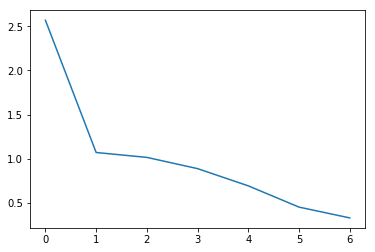

In [13]:
1#The scree plot provides support for the eigen values found previously. You can see the "elbow" turns at 1 on the y-values.

plt.plot(eig_val_cov)
plt.show()

In [16]:
#Narrowing down to the top three features that show enough difference to be interesting.

Sklearn_pca=PCA(n_components=3)
Y_sklearn = Sklearn_pca.fit_transform(X)

P = eig_vec_cov[:, 0]

Y = P.T.dot(Xt)

print('The percentage of total variance in the dataset explained by each','component from sklearn PCA. \n', Sklearn_pca.
     explained_variance_ratio_)


The percentage of total variance in the dataset explained by each component from sklearn PCA. 
 [0.36709224 0.15261968 0.14469918]


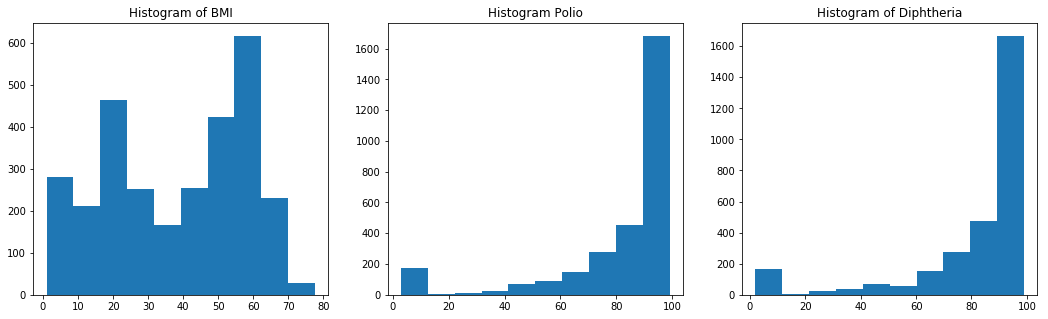

In [17]:
#Created histograms of the three most correlated features.

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.hist(life_exp_df["bmi"])
plt.title("Histogram of BMI")

plt.subplot(1,3,2)
plt.hist(life_exp_df["polio"])
plt.title("Histogram Polio")

plt.subplot(1,3,3)
plt.hist(life_exp_df["diphtheria"])
plt.title("Histogram of Diphtheria")

plt.show()

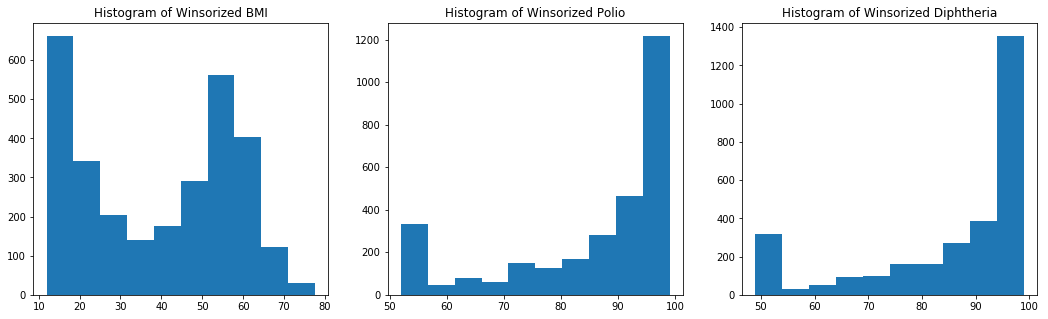

In [20]:
#With the three most correlated features I decided to winsorize them and see if I could generate a more "normal" distribution.

from scipy.stats.mstats import winsorize

plt.figure(figsize=(18,5))
winsorized_bmi = winsorize(life_exp_df["bmi"], (0.10,0))
winsorized_polio = winsorize(life_exp_df["polio"], (0.10, 0))
winsorized_diphtheria = winsorize(life_exp_df["diphtheria"], (0.10, 0))
winsorized_life_expect = winsorize(life_exp_df["life_expect"], (0, 0.10))

plt.subplot(1,3,1)
plt.hist(winsorized_bmi)
plt.title("Histogram of Winsorized BMI")

plt.subplot(1,3,2)
plt.hist(winsorized_polio)
plt.title("Histogram of Winsorized Polio")

plt.subplot(1,3,3)
plt.hist(winsorized_diphtheria)
plt.title("Histogram of Winsorized Diphtheria")

plt.show()

In [21]:
#Used the box cox on the winsorizing to see what effect it would have on the distribution.

from scipy.stats import boxcox

boxcox_winsorized_bmi = boxcox(winsorized_bmi)
boxcox_winsorized_polio = boxcox(winsorized_polio)
boxcox_winsorized_diphtheria = boxcox(winsorized_diphtheria)



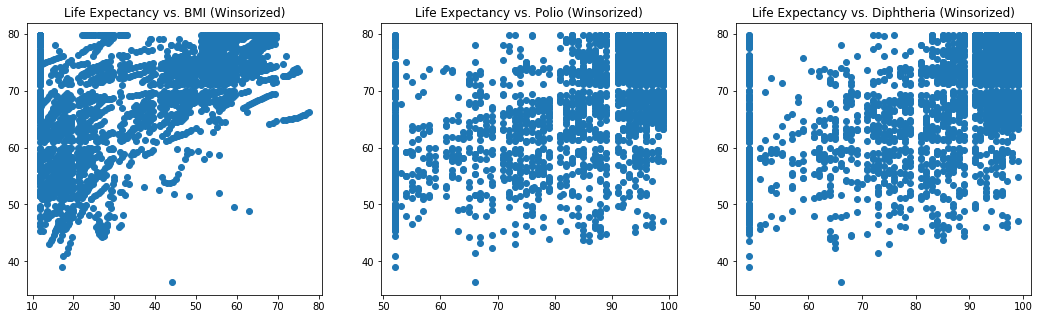

In [22]:
#Looking at the scatter plots I can see that there are some issues with the data. I have taken strides to eleviate the 
#issue with the zeros in the data. The graphs still look messy but they are showing a positive correlation.

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(winsorized_bmi, winsorized_life_expect)
plt.title("Life Expectancy vs. BMI (Winsorized)")

plt.subplot(1,3,2)
plt.scatter(winsorized_polio, winsorized_life_expect)
plt.title("Life Expectancy vs. Polio (Winsorized)")

plt.subplot(1,3,3)
plt.scatter(winsorized_diphtheria, winsorized_life_expect)
plt.title("Life Expectancy vs. Diphtheria (Winsorized)")


plt.show()

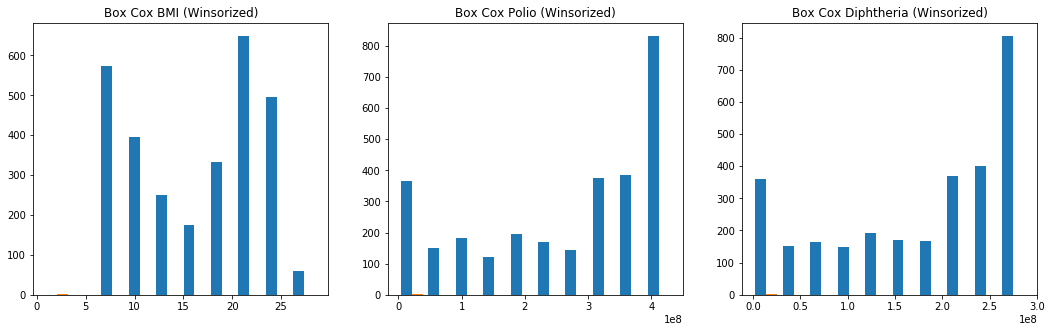

In [24]:
#Another atttempt to show the distributions of the three features that show the most variation among all the features.

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.hist(boxcox_winsorized_bmi)
plt.title("Box Cox BMI (Winsorized)")

plt.subplot(1,3,2)
plt.hist(boxcox_winsorized_polio)
plt.title("Box Cox Polio (Winsorized)")

plt.subplot(1,3,3)
plt.hist(boxcox_winsorized_diphtheria)
plt.title("Box Cox Diphtheria (Winsorized)")

plt.show()

Summary:

When I started the exploration I was convinced that the "schooling", "income composition of resources", and "BMI" were the most correlated to life expectancy. After running the correlations coefficient matrix I was almost positive. Then I ran the PCA, the three features that had the most variance were BMI, Polio, and Diphtheria. None of them had a normal distribution, but there iegen values were all >1 and they represent 67% of the variance among the features provided. This summarizes that they are they have the most affect on the life expectancy in this data set. BMI having the most affect representing 37% of the variance and getting a eigen value of 2.57.